In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.stats import kurtosis, skew
import warnings

def extract_stat_features(img):
    img_gray = img.convert('L')
    data = np.asarray(img_gray).astype(np.float32).flatten()
    data = np.clip(data, 1e-5, 255)
    eps = 1e-5

    try:
        std = np.std(data)
        range_val = np.max(data) - np.min(data)
        median = np.median(data)
        geo_median = np.exp(np.mean(np.log(data + eps)))
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            skewness = skew(data)
            kurt_val = kurtosis(data)

        d1 = np.diff(data)
        d2 = np.diff(d1)

        var0 = np.var(data) + eps
        var1 = np.var(d1) + eps
        var2 = np.var(d2) + eps

        mobility = np.sqrt(var1 / var0)
        raw_complexity = (var2 / var1) - (var1 / var0)
        raw_complexity = np.maximum(raw_complexity, 0)
        complexity = np.sqrt(raw_complexity)

        feats = np.array([std, range_val, median, geo_median, skewness, kurt_val, mobility, complexity], dtype=np.float32)
        feats = np.nan_to_num(feats, nan=0.0, posinf=0.0, neginf=0.0)

        return feats
    except:
        return np.zeros(8)

clean_dir = 'stegoimagesdataset/test/test/clean'
stego_dir = 'stegoimagesdataset/test/test/stego'

clean_map = {os.path.splitext(f)[0]: os.path.join(clean_dir, f) for f in os.listdir(clean_dir)}
stego_map = {}
for f in os.listdir(stego_dir):
    if f.endswith('.png'):
        key = f.split('_')[1]  # image_00001_eth_0.png -> '00001'
        stego_map.setdefault(key, []).append(os.path.join(stego_dir, f))

feature_names = ['std', 'range', 'median', 'geo_median', 'skewness', 'kurtosis', 'mobility', 'complexity']
nb_to_plot = 5

count = 0
for key in sorted(stego_map.keys()):
    if key not in clean_map:
        continue

    clean_path = clean_map[key]
    stego_paths = stego_map[key][:3]

    try:
        clean_img = Image.open(clean_path)
        clean_feats = extract_stat_features(clean_img)

        for steg_path in stego_paths:
            steg_img = Image.open(steg_path)
            steg_feats = extract_stat_features(steg_img)

            #x = np.arange(len(feature_names))
            #width = 0.35

            #plt.figure(figsize=(10, 4))
            #plt.bar(x - width/2, clean_feats, width, label='Clean', color='green')
            #plt.bar(x + width/2, steg_feats, width, label='Stego', color='red')
            #plt.xticks(x, feature_names, rotation=30)
            #plt.title(f"Comparison: clean vs {os.path.basename(steg_path)}")
            #plt.legend()
            #plt.tight_layout()
            #plt.show()
            print(f"clean {clean_path} vs {steg_path}")
            print(f"  Clean features: {clean_feats}")
            print(f"  Stego features: {steg_feats}")
            print(f"  Difference: {steg_feats - clean_feats}")

            count += 1
            if count >= nb_to_plot:
                break

    except Exception as e:
        print(f"Erreur avec {clean_path}: {e}")

    if count >= nb_to_plot:
        break


clean stegoimagesdataset/test/test/clean\04001.png vs stegoimagesdataset/test/test/stego\image_04001_eth_0.png
  Clean features: [ 1.11496925e+02  2.54999985e+02  2.45000000e+02  1.61622918e+00
 -7.74227500e-01 -1.33501935e+00  1.38167471e-01  1.40357482e+00]
  Stego features: [ 1.11496635e+02  2.54999985e+02  2.45000000e+02  1.61956811e+00
 -7.74227023e-01 -1.33501995e+00  1.38167903e-01  1.40357506e+00]
  Difference: [-2.8991699e-04  0.0000000e+00  0.0000000e+00  3.3389330e-03
  4.7683716e-07 -5.9604645e-07  4.3213367e-07  2.3841858e-07]
clean stegoimagesdataset/test/test/clean\04001.png vs stegoimagesdataset/test/test/stego\image_04001_html_0.png
  Clean features: [ 1.11496925e+02  2.54999985e+02  2.45000000e+02  1.61622918e+00
 -7.74227500e-01 -1.33501935e+00  1.38167471e-01  1.40357482e+00]
  Stego features: [ 1.1138718e+02  2.5499998e+02  2.4500000e+02  3.1766181e+00
 -7.7416039e-01 -1.3350471e+00  1.3822985e-01  1.4035033e+00]
  Difference: [-1.0974884e-01  0.0000000e+00  0.0000

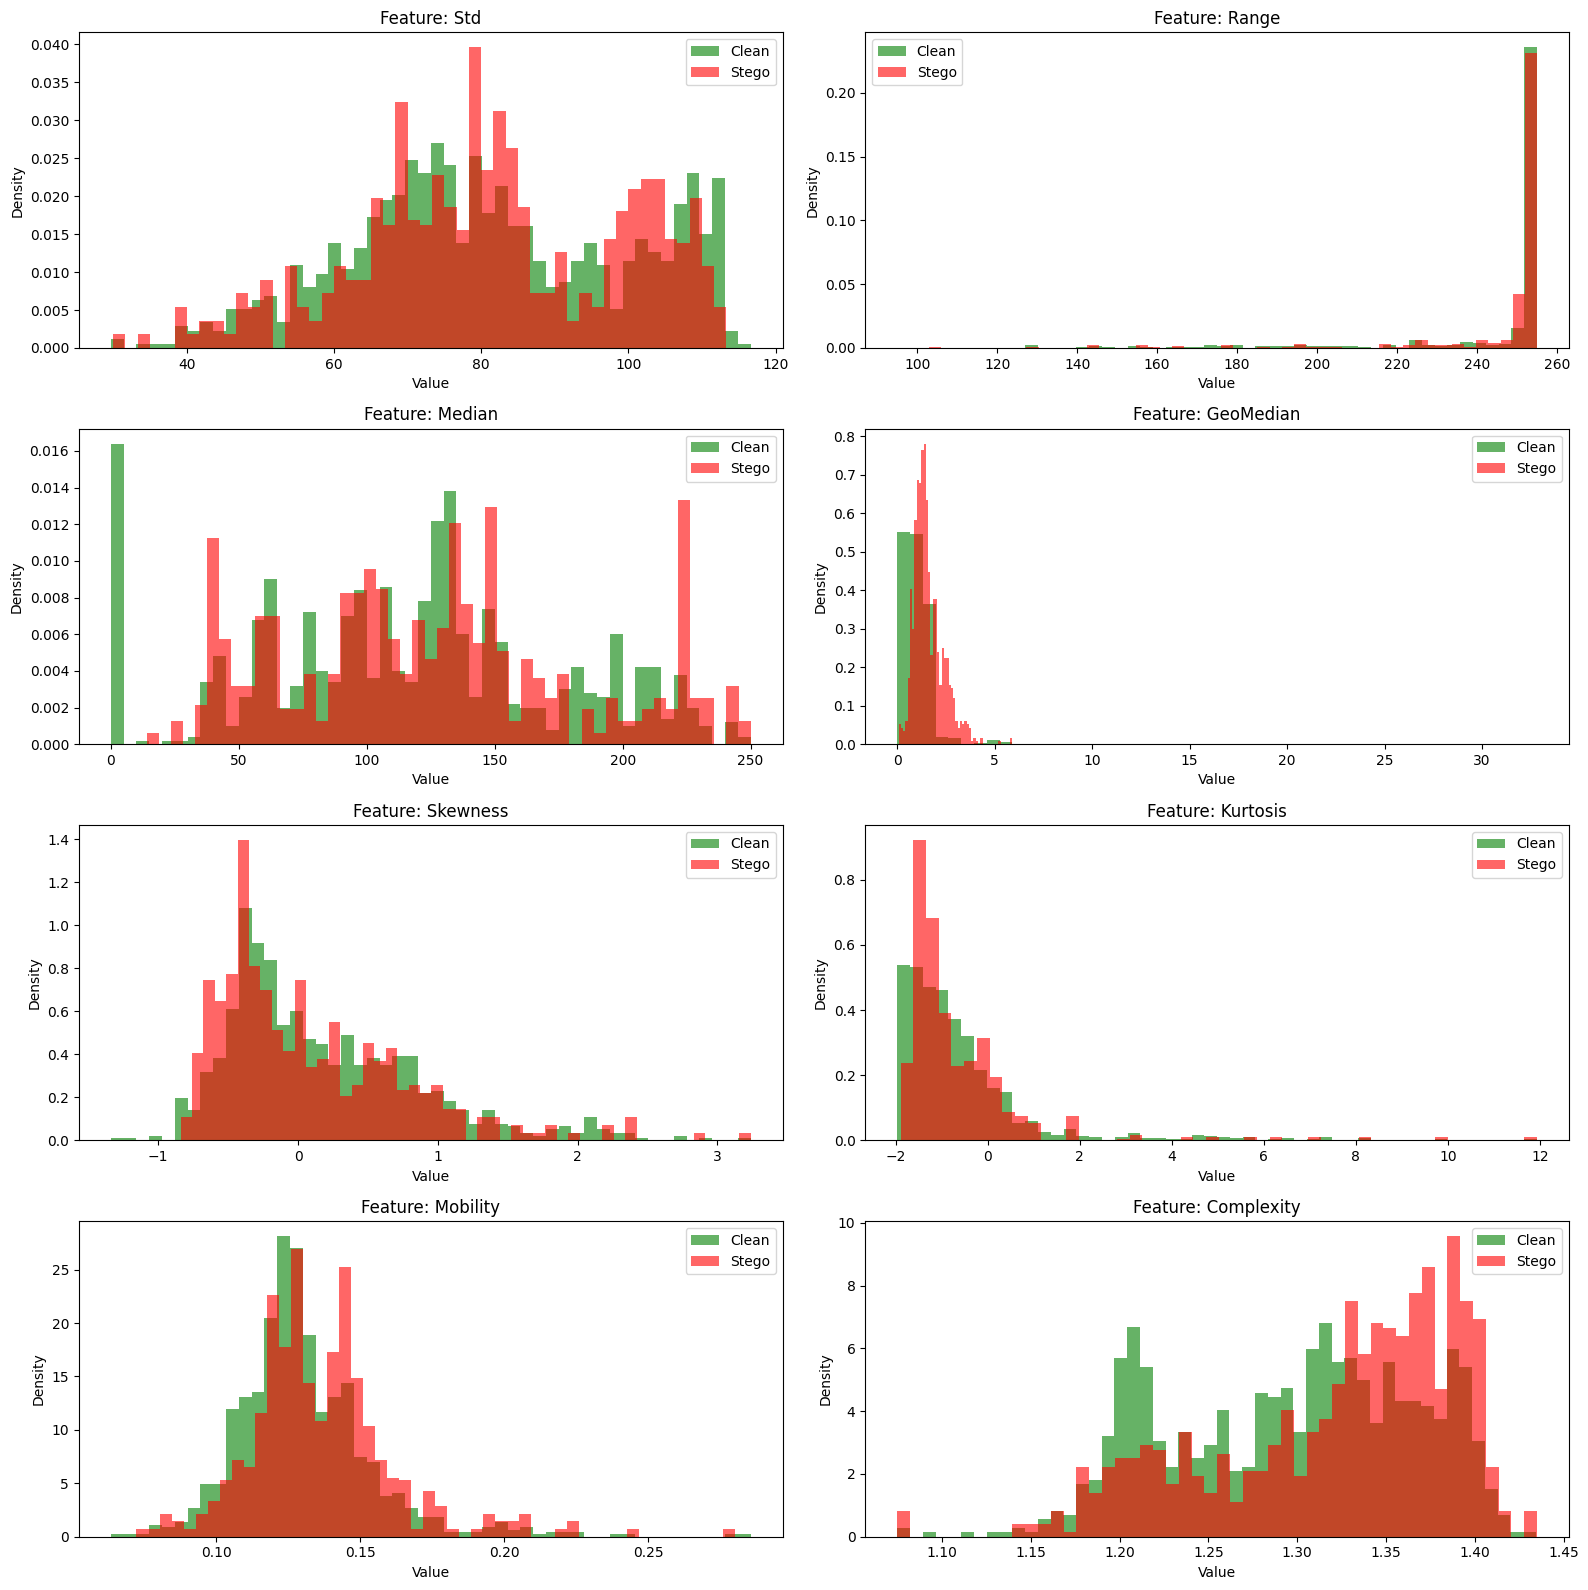

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.stats import kurtosis, skew
import warnings

clean_dir = 'stegoimagesdataset/test/test/clean'
stego_dir = 'stegoimagesdataset/test/test/stego'

def extract_stat_features(img):
    img_gray = img.convert('L')
    data = np.asarray(img_gray).astype(np.float32).flatten()
    data = np.clip(data, 1e-5, 255)
    eps = 1e-5

    try:
        std = np.std(data)
        range_val = np.max(data) - np.min(data)
        median = np.median(data)
        geo_median = np.exp(np.mean(np.log(data + eps)))
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            skewness = skew(data)
            kurt = kurtosis(data)

        d1 = np.diff(data)
        d2 = np.diff(d1)

        var0 = np.var(data) + eps
        var1 = np.var(d1) + eps
        var2 = np.var(d2) + eps

        mobility = np.sqrt(var1 / var0)
        raw_complexity = (var2 / var1) - (var1 / var0)
        raw_complexity = np.maximum(raw_complexity, 0)
        complexity = np.sqrt(raw_complexity)

        return [std, range_val, median, geo_median, skewness, kurt, mobility, complexity]

    except Exception as e:
        print("Erreur feature:", e)
        return [0] * 8

clean_feats = []
stego_feats = []

max_samples = 1000

for img_name in os.listdir(clean_dir)[:max_samples]:
    path = os.path.join(clean_dir, img_name)
    try:
        img = Image.open(path)
        feats = extract_stat_features(img)
        clean_feats.append(feats)
    except:
        continue

for img_name in os.listdir(stego_dir)[:max_samples]:
    path = os.path.join(stego_dir, img_name)
    try:
        img = Image.open(path)
        feats = extract_stat_features(img)
        stego_feats.append(feats)
    except:
        continue

clean_feats = np.array(clean_feats)
stego_feats = np.array(stego_feats)

feature_names = ['Std', 'Range', 'Median', 'GeoMedian', 'Skewness', 'Kurtosis', 'Mobility', 'Complexity']

plt.figure(figsize=(16, 16))
for i in range(8):
    plt.subplot(4, 2, i+1)
    plt.hist(clean_feats[:, i], bins=50, alpha=0.6, label='Clean', color='green', density=True)
    plt.hist(stego_feats[:, i], bins=50, alpha=0.6, label='Stego', color='red', density=True)
    plt.title(f'Feature: {feature_names[i]}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


### Amplify LSB Effect

- Goal: Amplify LSB effect by applying Laplacian on the image
- Check if there are changes in the distributions of the features

Clean features: [1.3669839e+02 6.2619453e+04 2.4447963e-03 7.5535588e-03 3.7490067e+02
 1.6840981e+05 1.0793169e+00 7.4322927e-01 1.3755693e+02 6.2990340e+04
 3.5794675e-03 7.5721308e-03 3.7457571e+02 1.6817722e+05 1.0796894e+00
 7.4461168e-01 1.3841643e+02 6.3361449e+04 2.3952611e-03 7.5720805e-03
 3.7425168e+02 1.6794552e+05 1.0800606e+00 7.4598181e-01]
Stego features 1: [1.3669887e+02 6.2619551e+04 3.0450225e-03 7.5602648e-03 3.7489853e+02
 1.6840850e+05 1.0793171e+00 7.4322861e-01 1.3755750e+02 6.2990441e+04
 3.6779940e-03 7.5711054e-03 3.7457306e+02 1.6817556e+05 1.0796889e+00
 7.4461287e-01 1.3841699e+02 6.3361551e+04 1.9782782e-03 7.5683049e-03
 3.7424902e+02 1.6794386e+05 1.0800602e+00 7.4598336e-01]
Stego features 2: [1.3669879e+02 6.2619543e+04 3.1747222e-03 7.5633805e-03 3.7489899e+02
 1.6840878e+05 1.0793171e+00 7.4322838e-01 1.3755751e+02 6.2990441e+04
 3.5375045e-03 7.5726472e-03 3.7457288e+02 1.6817548e+05 1.0796888e+00
 7.4461359e-01 1.3841704e+02 6.3361551e+04 1.154184

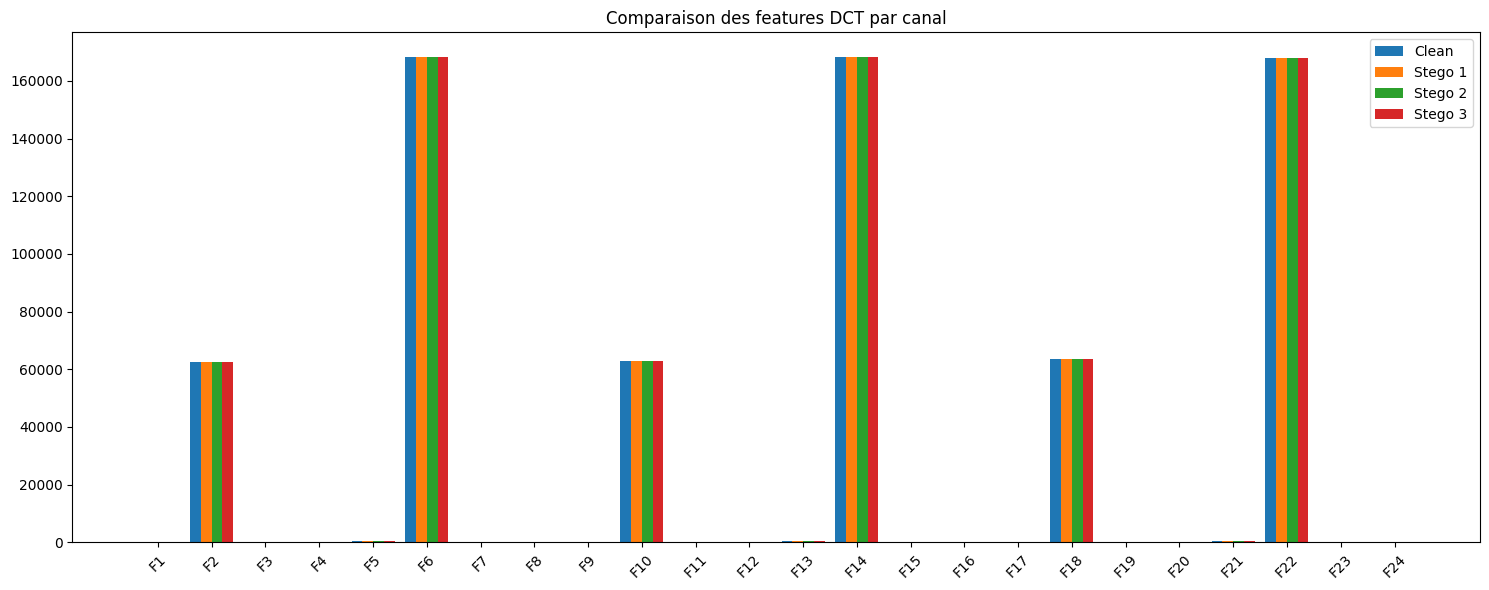

In [14]:
# Re-importation nécessaire après le reset de l'état
import numpy as np
import torch
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from pathlib import Path


def extract_dct_features(img_pil):
    """
    Extrait des features statistiques sur les coefficients DCT par canal (R, G, B)
    Retourne un vecteur de 24 features (8 par canal)
    """
    img_np = np.array(img_pil)  # [H, W, 3]
    features_all = []

    for c in range(3):  # R, G, B
        channel = img_np[:, :, c].astype(np.float32)
        dct_coeff = dct(dct(channel.T, norm='ortho').T, norm='ortho')  # DCT 2D

        data = dct_coeff.flatten()
        data = np.clip(data, 1e-5, None)
        eps = 1e-5

        std = np.std(data)
        rng = np.max(data) - np.min(data)
        median = np.median(data)
        geo_median = np.exp(np.mean(np.log(data + eps)))
        skewness = (np.mean((data - np.mean(data))**3)) / (np.std(data)**3 + eps)
        kurt = (np.mean((data - np.mean(data))**4)) / (np.std(data)**4 + eps) - 3

        d1 = np.diff(data)
        d2 = np.diff(d1)
        var0 = np.var(data) + eps
        var1 = np.var(d1) + eps
        var2 = np.var(d2) + eps

        mobility = np.sqrt(var1 / var0)
        complexity = np.sqrt(np.maximum((var2 / var1) - (var1 / var0), 0))

        features = np.array([std, rng, median, geo_median, skewness, kurt, mobility, complexity], dtype=np.float32)
        features_all.append(features)

    return np.concatenate(features_all)


# Chemins des images
img_dir = Path("stegoimagesdataset/train/train/")
clean_path = img_dir / "clean" / "00001.png"
stego_paths = [
    img_dir / "stego" / "image_00001_eth_0.png",
    img_dir / "stego" / "image_00001_eth_1.png",
    img_dir / "stego" / "image_00001_ps_0.png"
]

# Extraction des features
clean_img = Image.open(clean_path)
clean_feats = extract_dct_features(clean_img)

stego_feats_list = []
for path in stego_paths:
    stego_img = Image.open(path)
    feats = extract_dct_features(stego_img)
    stego_feats_list.append(feats)

print(f"Clean features: {clean_feats}")
for i, feats in enumerate(stego_feats_list):
    print(f"Stego features {i+1}: {feats}")

# Affichage comparatif
labels = [f'F{i+1}' for i in range(24)]
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(x - 1.5 * width, clean_feats, width, label='Clean')
for i, feats in enumerate(stego_feats_list):
    ax.bar(x + (i - 0.5) * width, feats, width, label=f'Stego {i+1}')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.set_title("Comparaison des features DCT par canal")
ax.legend()
plt.tight_layout()
plt.show()


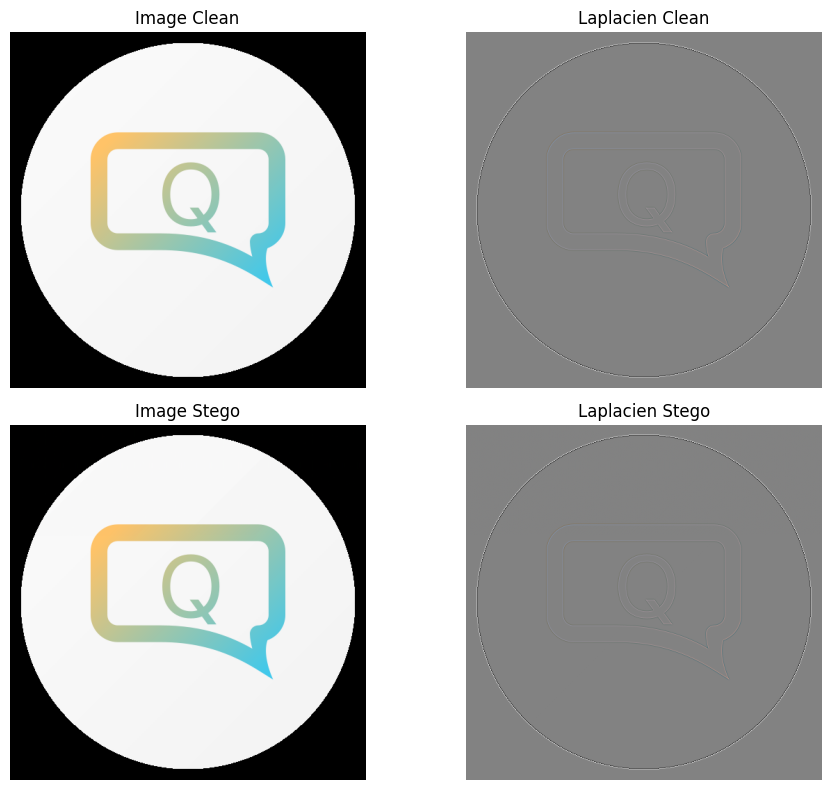

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def show_laplacian_effect(image_path_clean, image_path_stego):
    # Charger les images
    img_clean = np.array(Image.open(image_path_clean).convert("RGB"))
    img_stego = np.array(Image.open(image_path_stego).convert("RGB"))

    # Appliquer le filtre Laplacien
    laplacian_clean = cv2.Laplacian(img_clean, cv2.CV_32F)
    laplacian_stego = cv2.Laplacian(img_stego, cv2.CV_32F)

    # Mettre les images Laplacien en positif (optionnel pour visualiser joliment)
    laplacian_clean_vis = np.clip((laplacian_clean - laplacian_clean.min()) / (laplacian_clean.max() - laplacian_clean.min()), 0, 1)
    laplacian_stego_vis = np.clip((laplacian_stego - laplacian_stego.min()) / (laplacian_stego.max() - laplacian_stego.min()), 0, 1)

    # Affichage
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    axs[0, 0].imshow(img_clean)
    axs[0, 0].set_title("Image Clean")
    axs[0, 0].axis('off')

    axs[0, 1].imshow(laplacian_clean_vis)
    axs[0, 1].set_title("Laplacien Clean")
    axs[0, 1].axis('off')

    axs[1, 0].imshow(img_stego)
    axs[1, 0].set_title("Image Stego")
    axs[1, 0].axis('off')

    axs[1, 1].imshow(laplacian_stego_vis)
    axs[1, 1].set_title("Laplacien Stego")
    axs[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Exemple d'utilisation
show_laplacian_effect(
    "stegoimagesdataset/test/test/clean/04001.png",
    "stegoimagesdataset/test/test/stego/image_04001_html_0.png"
)


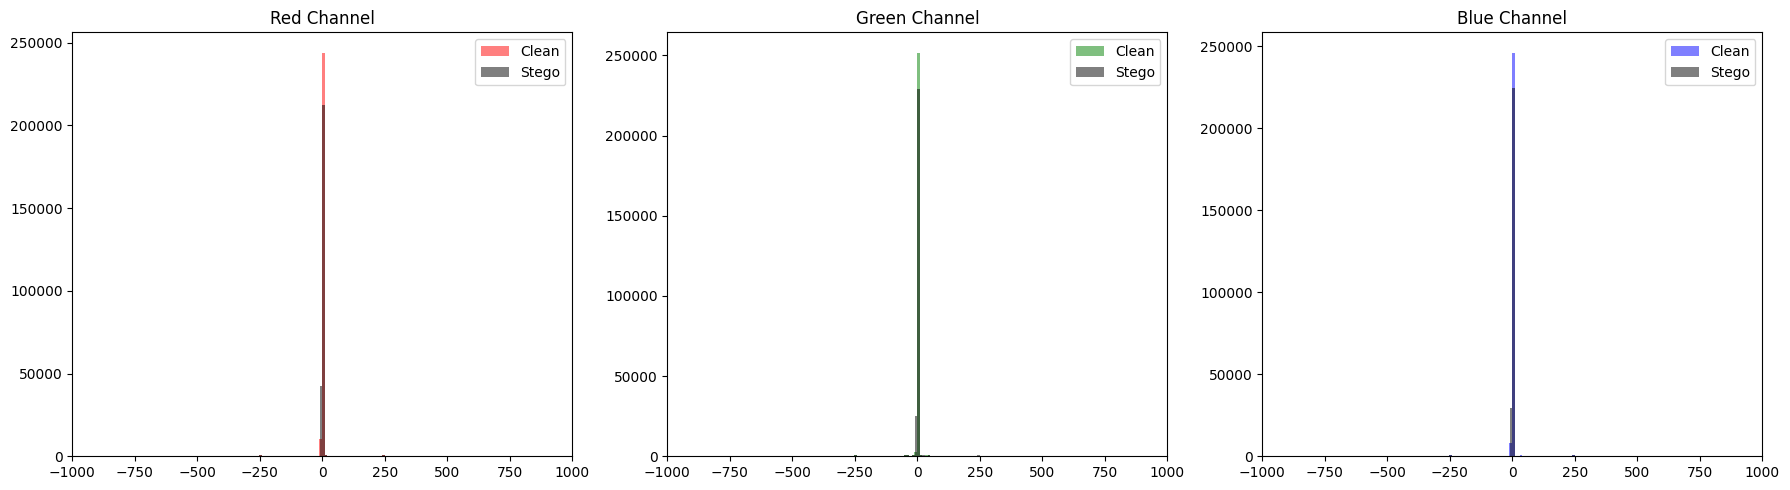

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

def plot_laplacian_superposed(clean_path, stego_path):
    img_clean = np.array(Image.open(clean_path).convert('RGB'))
    img_stego = np.array(Image.open(stego_path).convert('RGB'))

    colors = ['r', 'g', 'b']
    channel_names = ['Red', 'Green', 'Blue']

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for i in range(3):
        # Laplacien canal
        laplacian_clean = cv2.Laplacian(img_clean[:, :, i], cv2.CV_32F).flatten()
        laplacian_stego = cv2.Laplacian(img_stego[:, :, i], cv2.CV_32F).flatten()

        # Histogramme superposé
        axes[i].hist(laplacian_clean, bins=100, color=colors[i], alpha=0.5, label='Clean')
        axes[i].hist(laplacian_stego, bins=100, color='black', alpha=0.5, label='Stego')

        axes[i].set_title(f'{channel_names[i]} Channel')
        axes[i].legend()
        axes[i].set_xlim(-1000, 1000)  # Pour comparer facilement

    plt.tight_layout()
    plt.show()

# Exemple d'utilisation
plot_laplacian_superposed(
    'stegoimagesdataset/test/test/clean/04001.png',
    'stegoimagesdataset/test/test/stego/image_04001_html_0.png'
)


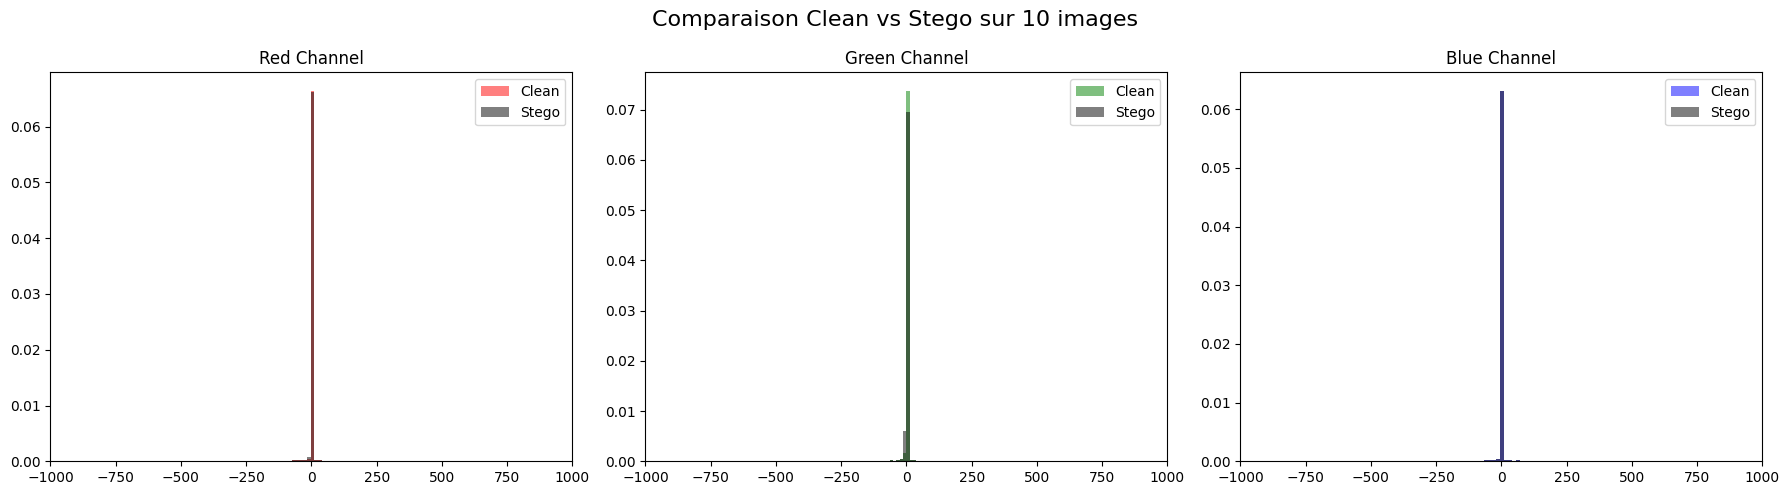

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
import random

def plot_laplacian_superposed_batch(clean_dir, stego_dir, n_images=10):
    clean_imgs = sorted([f for f in os.listdir(clean_dir) if f.endswith('.png')])
    selected_imgs = random.sample(clean_imgs, n_images)

    laplacians_clean = {0: [], 1: [], 2: []}
    laplacians_stego = {0: [], 1: [], 2: []}

    for img_name in selected_imgs:
        base_id = os.path.splitext(img_name)[0]
        clean_path = os.path.join(clean_dir, img_name)

        # Chercher une stégo correspondante
        stego_candidates = [f for f in os.listdir(stego_dir) if base_id in f]
        if not stego_candidates:
            continue
        stego_name = random.choice(stego_candidates)
        stego_path = os.path.join(stego_dir, stego_name)

        img_clean = np.array(Image.open(clean_path).convert('RGB'))
        img_stego = np.array(Image.open(stego_path).convert('RGB'))

        for c in range(3):
            laplacians_clean[c].append(cv2.Laplacian(img_clean[:, :, c], cv2.CV_32F).flatten())
            laplacians_stego[c].append(cv2.Laplacian(img_stego[:, :, c], cv2.CV_32F).flatten())

    # Concaténer tous les résultats
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    colors = ['r', 'g', 'b']
    channel_names = ['Red', 'Green', 'Blue']

    for i in range(3):
        all_clean = np.concatenate(laplacians_clean[i])
        all_stego = np.concatenate(laplacians_stego[i])

        axes[i].hist(all_clean, bins=100, color=colors[i], alpha=0.5, label='Clean', density=True)
        axes[i].hist(all_stego, bins=100, color='black', alpha=0.5, label='Stego', density=True)

        axes[i].set_title(f'{channel_names[i]} Channel')
        axes[i].legend()
        axes[i].set_xlim(-1000, 1000)

    plt.suptitle(f'Comparaison Clean vs Stego sur {n_images} images', fontsize=16)
    plt.tight_layout()
    plt.show()

# Utilisation
plot_laplacian_superposed_batch(
    clean_dir='stegoimagesdataset/test/test/clean',
    stego_dir='stegoimagesdataset/test/test/stego',
    n_images=10  # Choisir 10 images au hasard
)


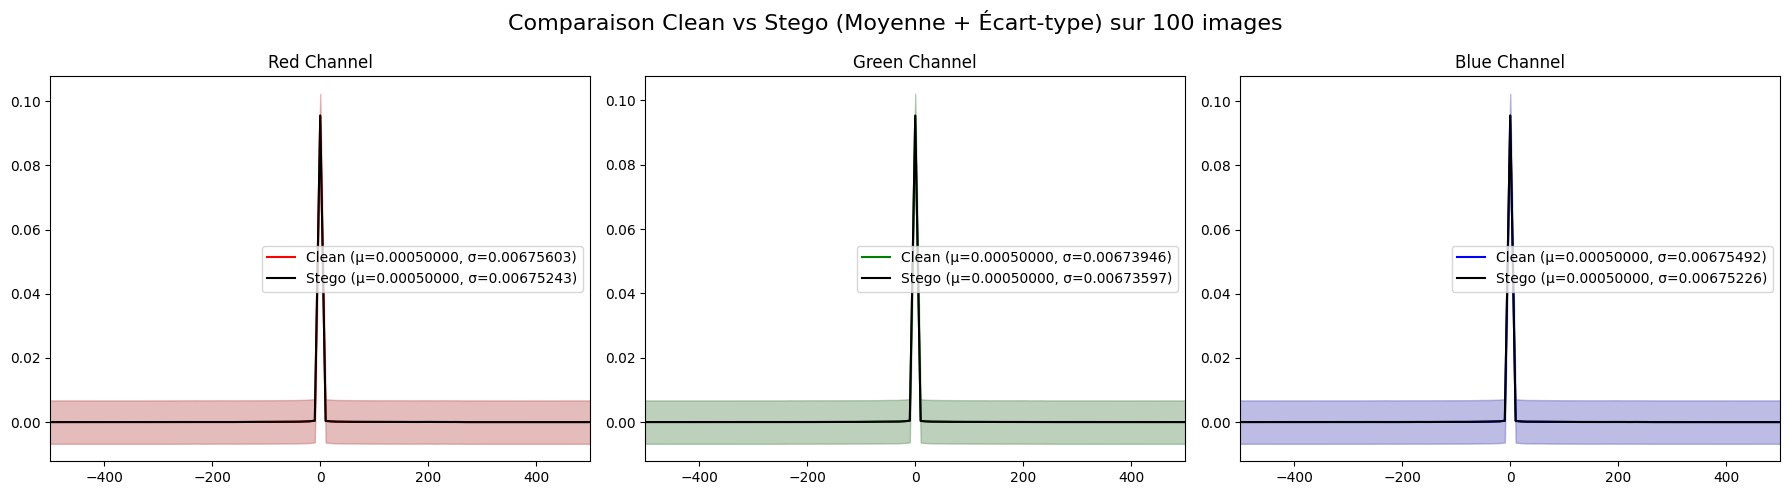

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
import random

def plot_laplacian_mean_std(clean_dir, stego_dir, n_images=10):
    clean_imgs = sorted([f for f in os.listdir(clean_dir) if f.endswith('.png')])
    selected_imgs = random.sample(clean_imgs, n_images)

    laplacians_clean = {0: [], 1: [], 2: []}
    laplacians_stego = {0: [], 1: [], 2: []}

    for img_name in selected_imgs:
        base_id = os.path.splitext(img_name)[0]
        clean_path = os.path.join(clean_dir, img_name)

        # Chercher une stégo correspondante
        stego_candidates = [f for f in os.listdir(stego_dir) if base_id in f]
        if not stego_candidates:
            continue
        stego_name = random.choice(stego_candidates)
        stego_path = os.path.join(stego_dir, stego_name)

        img_clean = np.array(Image.open(clean_path).convert('RGB'))
        img_stego = np.array(Image.open(stego_path).convert('RGB'))

        for c in range(3):
            laplacians_clean[c].append(cv2.Laplacian(img_clean[:, :, c], cv2.CV_32F).flatten())
            laplacians_stego[c].append(cv2.Laplacian(img_stego[:, :, c], cv2.CV_32F).flatten())

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    colors = ['r', 'g', 'b']
    channel_names = ['Red', 'Green', 'Blue']

    bins = np.linspace(-1000, 1000, 200)

    for i in range(3):
        all_clean = np.concatenate(laplacians_clean[i])
        all_stego = np.concatenate(laplacians_stego[i])

        # Calculer histogrammes
        hist_clean, _ = np.histogram(all_clean, bins=bins, density=True)
        hist_stego, _ = np.histogram(all_stego, bins=bins, density=True)
        centers = (bins[:-1] + bins[1:]) / 2

        # Moyenne
        mean_clean = np.mean(hist_clean)
        mean_stego = np.mean(hist_stego)

        # Écart-type
        std_clean = np.std(hist_clean)
        std_stego = np.std(hist_stego)

        # Courbes
        axes[i].plot(centers, hist_clean, label=f'Clean (µ={mean_clean:.8f}, σ={std_clean:.8f})', color=colors[i])
        axes[i].plot(centers, hist_stego, label=f'Stego (µ={mean_stego:.8f}, σ={std_stego:.8f})', color='black')

        axes[i].fill_between(centers, hist_clean-std_clean, hist_clean+std_clean, color=colors[i], alpha=0.2)
        axes[i].fill_between(centers, hist_stego-std_stego, hist_stego+std_stego, color='gray', alpha=0.2)

        axes[i].set_title(f'{channel_names[i]} Channel')
        axes[i].legend()
        axes[i].set_xlim(-500, 500)

    plt.suptitle(f'Comparaison Clean vs Stego (Moyenne + Écart-type) sur {n_images} images', fontsize=16)
    plt.tight_layout()
    plt.show()

# Utilisation
plot_laplacian_mean_std(
    clean_dir='stegoimagesdataset/test/test/clean',
    stego_dir='stegoimagesdataset/test/test/stego',
    n_images=100  # tu peux tester aussi avec 50 ou 100
)


In [9]:
import numpy as np
import os
import random
from PIL import Image
import cv2
from scipy.stats import ks_2samp

def laplacian_ks_test(clean_dir, stego_dir, n_images=50):
    clean_imgs = sorted([f for f in os.listdir(clean_dir) if f.endswith('.png')])
    selected_imgs = random.sample(clean_imgs, n_images)

    laplacians_clean = {0: [], 1: [], 2: []}
    laplacians_stego = {0: [], 1: [], 2: []}

    for img_name in selected_imgs:
        base_id = os.path.splitext(img_name)[0]
        clean_path = os.path.join(clean_dir, img_name)

        # Chercher stego associé
        stego_candidates = [f for f in os.listdir(stego_dir) if base_id in f]
        if not stego_candidates:
            continue
        stego_name = random.choice(stego_candidates)
        stego_path = os.path.join(stego_dir, stego_name)

        img_clean = np.array(Image.open(clean_path).convert('RGB'))
        img_stego = np.array(Image.open(stego_path).convert('RGB'))

        for c in range(3):
            laplacians_clean[c].append(cv2.Laplacian(img_clean[:, :, c], cv2.CV_32F).flatten())
            laplacians_stego[c].append(cv2.Laplacian(img_stego[:, :, c], cv2.CV_32F).flatten())

    # Concaténer tous les canaux
    results = {}
    for c in range(3):
        data_clean = np.concatenate(laplacians_clean[c])
        data_stego = np.concatenate(laplacians_stego[c])

        # Kolmogorov-Smirnov Test
        stat, p_value = ks_2samp(data_clean, data_stego)

        results[c] = (stat, p_value)

    return results

# Utilisation
results = laplacian_ks_test(
    clean_dir='stegoimagesdataset/test/test/clean',
    stego_dir='stegoimagesdataset/test/test/stego',
    n_images=50
)

# 🔥 Affichage
channel_names = ['Red', 'Green', 'Blue']
for i in range(3):
    stat, p_value = results[i]
    print(f"Canal {channel_names[i]} ➔ KS-Statistic: {stat:.4f} | p-value: {p_value:.4e}")

    if p_value < 0.05:
        print("  ➔ 🚨 Différence significative détectée !")
    else:
        print("  ➔ ✅ Pas de différence significative.")


Canal Red ➔ KS-Statistic: 0.0693 | p-value: 0.0000e+00
  ➔ 🚨 Différence significative détectée !
Canal Green ➔ KS-Statistic: 0.0697 | p-value: 0.0000e+00
  ➔ 🚨 Différence significative détectée !
Canal Blue ➔ KS-Statistic: 0.0719 | p-value: 0.0000e+00
  ➔ 🚨 Différence significative détectée !


In [2]:
import os
import hashlib
from PIL import Image
import numpy as np

def compute_md5(img_path):
    """Calcule un hash MD5 de l'image pour vérifier unicité."""
    img = Image.open(img_path).convert("RGB")
    img_array = np.array(img)
    img_bytes = img_array.tobytes()
    return hashlib.md5(img_bytes).hexdigest()

def check_uniqueness_in_folder(folder_path):
    print(f"🔎 Vérification unicité dans {folder_path}...")
    hashes = set()
    duplicates = 0

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            img_hash = compute_md5(img_path)

            if img_hash in hashes:
                duplicates += 1
                print(f"⚠️ Doublon trouvé : {filename} (hash: {img_hash})")
            else:
                hashes.add(img_hash)

    total_images = len([f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    print(f"✅ Total images vérifiées : {total_images}")
    if duplicates == 0:
        print("🎯 Aucune duplication trouvée.\n")
    else:
        print(f"⚠️ {duplicates} duplicats trouvés.\n")

# === Exemple d'utilisation ===
folders = [
    'stegoimagesdataset/train/train/clean',
    'stegoimagesdataset/train/train/stego',
    'stegoimagesdataset/val/val/clean',
    'stegoimagesdataset/val/val/stego',
    'stegoimagesdataset/test/test/clean',
    'stegoimagesdataset/test/test/stego'
]

for folder in folders:
    check_uniqueness_in_folder(folder)


🔎 Vérification unicité dans stegoimagesdataset/train/train/clean...
⚠️ Doublon trouvé : 00309.png (hash: fe33f185c533efc29fb164e3f1cf2285)
⚠️ Doublon trouvé : 00320.png (hash: 3b497ce994efd79755aa9b7cd1cda96d)
⚠️ Doublon trouvé : 00375.png (hash: 2e7c977545ccff9e1e914b42c26bf626)
⚠️ Doublon trouvé : 00434.png (hash: 7673a92af7527dd3198a4dfaa1a89bc6)
⚠️ Doublon trouvé : 00436.png (hash: 42fd0f9b49038339cd90368625ca88e7)
⚠️ Doublon trouvé : 00448.png (hash: d18c2eb3ced891446e0c81a928538a5d)
⚠️ Doublon trouvé : 00466.png (hash: 79fd5e8c4a8a8b4ef85a348f4075a22a)
⚠️ Doublon trouvé : 01092.png (hash: 104d4753fa4bfed1907b5f2e7407e3cc)
⚠️ Doublon trouvé : 02033.png (hash: 881cf2c96a40e90733e7eebf78e97b7b)
⚠️ Doublon trouvé : 02624.png (hash: 061dd344e8f7472caea328ec57a0420f)
⚠️ Doublon trouvé : 03064.png (hash: 39427e936805945058c9c2ac6a8dca3f)
⚠️ Doublon trouvé : 03065.png (hash: cb18a5d28e77522dfec6a6255bc3847e)
⚠️ Doublon trouvé : 03072.png (hash: cb18a5d28e77522dfec6a6255bc3847e)
⚠️ Doublo

KeyboardInterrupt: 

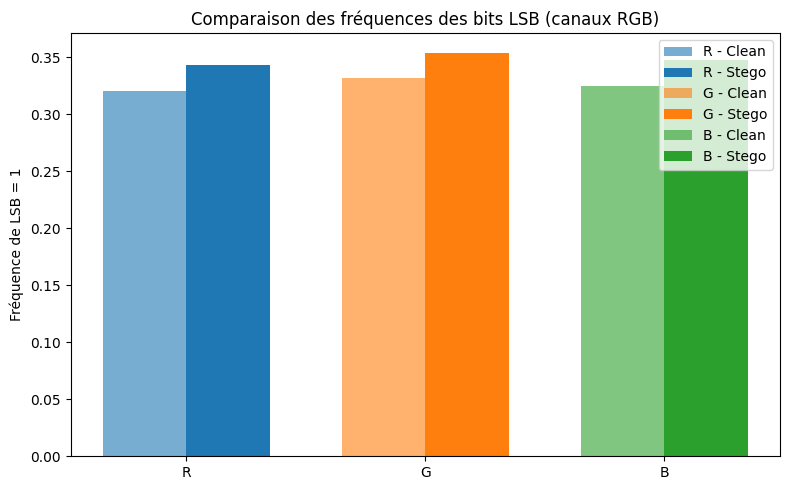

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def extract_lsb_bits(image):
    """Extrait les bits LSB (dernier bit) pour chaque pixel RGB."""
    img_array = np.array(image)
    lsb_array = img_array & 1
    return lsb_array

def compute_lsb_distribution(folder_path):
    bit_counts = np.zeros((3, 2))
    image_count = 0

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            image = Image.open(os.path.join(folder_path, filename)).convert('RGB')
            lsb = extract_lsb_bits(image)
            for channel in range(3):  # R, G, B
                values, counts = np.unique(lsb[..., channel], return_counts=True)
                for v, c in zip(values, counts):
                    bit_counts[channel, v] += c
            image_count += 1

    return bit_counts, image_count

def plot_lsb_distribution(bit_counts_clean, bit_counts_stego):
    labels = ['R', 'G', 'B']
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8, 5))

    for i, color in enumerate(labels):
        total = bit_counts_clean[i].sum()
        ax.bar(x[i] - width/2, bit_counts_clean[i, 1] / total, width, label=f'{color} - Clean', color=f'C{i}', alpha=0.6)
        total = bit_counts_stego[i].sum()
        ax.bar(x[i] + width/2, bit_counts_stego[i, 1] / total, width, label=f'{color} - Stego', color=f'C{i}', alpha=1.0)

    ax.set_ylabel("Fréquence de LSB = 1")
    ax.set_title("Comparaison des fréquences des bits LSB (canaux RGB)")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.tight_layout()
    plt.show()

clean_path = "stegoimagesdataset/test/test/clean"
stego_path = "stegoimagesdataset/test/test/stego"

bit_counts_clean, _ = compute_lsb_distribution(clean_path)
bit_counts_stego, _ = compute_lsb_distribution(stego_path)
plot_lsb_distribution(bit_counts_clean, bit_counts_stego)


In [3]:
import torch
import torch.nn as nn
from torchvision import transforms, models
from PIL import Image
import numpy as np
import cv2

model_path = "Models/Thebestsofar/TheGoatWithuneventestclass.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image_path = "stegoimagesdataset/test/test/stego/image_04001_eth_0.png"

def apply_laplacian_rgb(img_pil):
    img_np = np.array(img_pil)
    laplacian_channels = []
    for c in range(3):
        channel = img_np[:, :, c]
        laplacian = cv2.Laplacian(channel, cv2.CV_32F)
        laplacian = cv2.convertScaleAbs(laplacian)
        laplacian_channels.append(laplacian)
    img_lap = np.stack(laplacian_channels, axis=-1)
    return Image.fromarray(img_lap)


transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


model = models.resnet18(weights=None)
model.fc = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(model.fc.in_features, 2)
)
model.load_state_dict(torch.load(model_path))
model = model.to(device).eval()

img = Image.open(image_path).convert("RGB")
img_lap = apply_laplacian_rgb(img)
input_tensor = transform(img_lap).unsqueeze(0).to(device)

with torch.no_grad():
    output = model(input_tensor)
    prob = torch.softmax(output, dim=1)
    pred = torch.argmax(prob, dim=1).item()

print(f"✔️ Prédiction : {'Stego' if pred == 1 else 'Clean'} (Probas: Clean={prob[0,0]:.3f}, Stego={prob[0,1]:.3f})")


C:\Users\kilio\AppData\Local\Temp\ipykernel_19356\1277872459.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


✔️ Prédiction : Stego (Probas: Clean=0.002, Stego=0.998)


In [129]:
import torch
import torch.nn as nn
from torchvision import transforms, models
from PIL import Image
import numpy as np
import cv2
import random




def add_gaussian_noise(img_np, mean=0, std=10):
    noise = np.random.normal(mean, std, img_np.shape).astype(np.float32)
    noisy = img_np.astype(np.float32) + noise
    return np.clip(noisy, 0, 255).astype(np.uint8)

def add_salt_pepper_noise(img_np, amount=0.01):
    output = img_np.copy()
    num_salt = int(np.ceil(amount * img_np.size * 0.5))
    coords = [np.random.randint(0, i - 1, num_salt) for i in img_np.shape[:2]]
    output[coords[0], coords[1]] = 255

    num_pepper = int(np.ceil(amount * img_np.size * 0.5))
    coords = [np.random.randint(0, i - 1, num_pepper) for i in img_np.shape[:2]]
    output[coords[0], coords[1]] = 0
    return output

def add_blur(img_np, kernel_size=3):
    return cv2.blur(img_np, (kernel_size, kernel_size))

def apply_laplacian_rgb(img_pil, noise="none"):
    img_np = np.array(img_pil)

    if noise == "gaussian":
        img_np = add_gaussian_noise(img_np)
    elif noise == "salt_pepper":
        img_np = add_salt_pepper_noise(img_np)
    elif noise == "blur":
        img_np = add_blur(img_np)

    laplacian_channels = []
    for c in range(3):
        channel = img_np[:, :, c]
        lap = cv2.Laplacian(channel, cv2.CV_32F)
        lap = cv2.convertScaleAbs(lap)
        laplacian_channels.append(lap)

    img_lap = np.stack(laplacian_channels, axis=-1)
    return Image.fromarray(img_lap)

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

model = models.resnet18(weights=None)
model.fc = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(model.fc.in_features, 2)
)
model.load_state_dict(torch.load(model_path))
model = model.to(device).eval()

model_path = "Models/Thebestsofar/withNoise3.pth"
image_path = "stegoimagesdataset/test/test/stego/image_04001_eth_0.png"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


noise_type = "none"  # "none", "gaussian", "salt_pepper", "blur"

img = Image.open(image_path).convert("RGB")
img_lap = apply_laplacian_rgb(img, noise=noise_type)
input_tensor = transform(img_lap).unsqueeze(0).to(device)

with torch.no_grad():
    output = model(input_tensor)
    prob = torch.softmax(output, dim=1)
    pred = torch.argmax(prob, dim=1).item()

print(f"✔️ Prédiction : {'Stego' if pred == 1 else 'Clean'} (Probas: Clean={prob[0,0]:.3f}, Stego={prob[0,1]:.3f})")


✔️ Prédiction : Stego (Probas: Clean=0.000, Stego=1.000)


C:\Users\kilio\AppData\Local\Temp\ipykernel_19356\4292611592.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))
